# The battle of neighborhooods

##### Using Foursquare api, I am going to try and suggest restaurants in Peoria, IL(A small city down south of Chicago). I will then group these restaurants based on their similarities of cuisine so that a user can make an informed choice and have a satisfying outing at the place.

## Uncomment necessary lines for installation of libraries necessary 

In [1]:
!pip install folium
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab

## Imports 

In [2]:
import pandas as pd
# library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files


from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import numpy as np

print('Libraries imported.')

Libraries imported.


### Address of Peoria, IL

In [3]:
address = 'Peoria, Illinois'

geolocator = Nominatim()
loc = geolocator.geocode(address)
latitude = loc.latitude
longitude = loc.longitude
print('The geograpical coordinate of Peoria,IL  {}, {}.'.format(latitude, longitude))

C:\Users\chinni\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Peoria,IL  40.6938609, -89.5891008.


### Foursquare credentials

In [4]:
CLIENT_ID = 'N3T3E1HBHMOLYDAS5ZSP2AF23IW1XLSZ1HSRICD1RQCPLE4O' # your Foursquare ID
CLIENT_SECRET = 'FEPWSOFPSRMGZGTPSB440AITZKZFEL2GJJ5QAQL35ABJCPYB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


### Explore venues around Peoria, IL

In [5]:

LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 10000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
#print(url)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d8f9cba475abd00396daa8d'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Peoria',
  'headerFullLocation': 'Peoria',
  'headerLocationGranularity': 'city',
  'totalResults': 195,
  'suggestedBounds': {'ne': {'lat': 40.783860990000086,
    'lng': -89.47062077940681},
   'sw': {'lat': 40.60386080999991, 'lng': -89.70758082059318}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '545ab52a498ec18f7e377c4c',
       'name': 'Pére Marquette Marriott',
       'location': {'address': '501 Main St',
        'lat': 40.6939,
        'lng': -89.5922572,
        'labeledLatLngs': [{'label': 'display',
          'lat':

## define function to get catgeory type

In [6]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [7]:
# get catgeroies type

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

print(nearby_venues.shape)
nearby_venues

(100, 5)


,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,Pére Marquette Marriott,545ab52a498ec18f7e377c4c,Hotel,40.693900,-89.592257
1,Thirty-Thirty Coffee Company,4eac9fb4c2ee782cf42582da,Coffee Shop,40.696840,-89.594394
2,Peoria Riverfront,4bccc523cc8cd13a6a8bc1cf,Waterfront,40.689354,-89.587231
3,Sugar,524f526b11d25d7ae15b2ab1,Pizza Place,40.685629,-89.599068
4,Obed & Isaac's,57eaf4f9498ec4f18afef687,Brewery,40.696208,-89.588463
5,Jim's Steak House,4c1d4a89b4e62d7f6989dc93,Steakhouse,40.692690,-89.590499
6,Zion Coffee Bar,5894d99b1470b050ba3a18c5,Coffee Shop,40.686305,-89.598495
7,Contemporary Art Center of Peoria,4c5cea4f9b28d13a6c635870,Performing Arts Venue,40.688164,-89.590527
8,Chili's Grill & Bar,4bb63733ef159c74a29875f7,Tex-Mex Restaurant,40.682540,-89.582335
9,Bearded Owl Brewing,5976587079f6c704d97a0602,Brewery,40.685586,-89.595260


In [8]:
#fix the column names so they look relatively normal

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,id,categories,lat,lng
0,Pére Marquette Marriott,545ab52a498ec18f7e377c4c,Hotel,40.693900,-89.592257
1,Thirty-Thirty Coffee Company,4eac9fb4c2ee782cf42582da,Coffee Shop,40.696840,-89.594394
2,Peoria Riverfront,4bccc523cc8cd13a6a8bc1cf,Waterfront,40.689354,-89.587231
3,Sugar,524f526b11d25d7ae15b2ab1,Pizza Place,40.685629,-89.599068
4,Obed & Isaac's,57eaf4f9498ec4f18afef687,Brewery,40.696208,-89.588463
5,Jim's Steak House,4c1d4a89b4e62d7f6989dc93,Steakhouse,40.692690,-89.590499
6,Zion Coffee Bar,5894d99b1470b050ba3a18c5,Coffee Shop,40.686305,-89.598495
7,Contemporary Art Center of Peoria,4c5cea4f9b28d13a6c635870,Performing Arts Venue,40.688164,-89.590527
8,Chili's Grill & Bar,4bb63733ef159c74a29875f7,Tex-Mex Restaurant,40.682540,-89.582335
9,Bearded Owl Brewing,5976587079f6c704d97a0602,Brewery,40.685586,-89.595260


In [9]:
nearby_venues['categories'].unique()

array(['Hotel', 'Coffee Shop', 'Waterfront', 'Pizza Place', 'Brewery',
       'Steakhouse', 'Performing Arts Venue', 'Tex-Mex Restaurant',
       'American Restaurant', 'Gym', 'Café', 'Baseball Stadium',
       'Vietnamese Restaurant', 'Sporting Goods Shop', 'Gastropub', 'Bar',
       'Event Space', 'Karaoke Bar', 'Pet Store', 'Farmers Market', 'Pub',
       'Theater', 'Mexican Restaurant', 'Wings Joint', 'Lounge',
       'Fast Food Restaurant', 'Bakery', 'General Entertainment',
       'Warehouse Store', 'Ice Cream Shop', 'Sandwich Place',
       'Burger Joint', 'German Restaurant', 'Breakfast Spot',
       'Grocery Store', 'Deli / Bodega', 'Zoo', 'BBQ Joint',
       'Supermarket', 'Seafood Restaurant', 'Butcher', 'Big Box Store',
       'Hardware Store', 'Beer Bar', 'Italian Restaurant',
       'Smoothie Shop', 'College Rec Center', 'Scenic Lookout',
       'Fried Chicken Joint', 'Salon / Barbershop', 'Liquor Store',
       'Department Store', 'Asian Restaurant', 'Hot Dog Joint',
   

In [10]:
#remove rows which are not of interest

removal_list = ['Hotel', 'Waterfront', 'Brewery', 'Performing Arts Venue', 'Gym',
                'Baseball Stadium',  'Sporting Goods Shop', 
                 'Event Space', 'Pet Store', 'Farmers Market', 
       'Theater', 'General Entertainment',
       'Warehouse Store', 'Grocery Store', 'Zoo', 
       'Supermarket', 'Butcher', 'Big Box Store',
       'Hardware Store', 'College Rec Center', 'Scenic Lookout',
       'Salon / Barbershop', 'Liquor Store',
       'Department Store', 'Other Great Outdoors']

nearby_venues2 = nearby_venues.copy()


#getting a clear dataframe of just restaurants
nearby_venues2 = nearby_venues2[~nearby_venues2['categories'].isin(removal_list)]
print(nearby_venues2.shape)
nearby_venues2

(71, 5)


,name,id,categories,lat,lng
1,Thirty-Thirty Coffee Company,4eac9fb4c2ee782cf42582da,Coffee Shop,40.696840,-89.594394
3,Sugar,524f526b11d25d7ae15b2ab1,Pizza Place,40.685629,-89.599068
5,Jim's Steak House,4c1d4a89b4e62d7f6989dc93,Steakhouse,40.692690,-89.590499
6,Zion Coffee Bar,5894d99b1470b050ba3a18c5,Coffee Shop,40.686305,-89.598495
8,Chili's Grill & Bar,4bb63733ef159c74a29875f7,Tex-Mex Restaurant,40.682540,-89.582335
10,Two25,4b7def8ff964a520eada2fe3,American Restaurant,40.693379,-89.587394
12,One World Eats & Drinks,4b637fe5f964a520ae7e2ae3,Café,40.699866,-89.613044
14,Thanh Linh,4b85639af964a520b55a31e3,Vietnamese Restaurant,40.699872,-89.612206
15,Rhythm Kitchen,4ba2d01cf964a520441b38e3,American Restaurant,40.688171,-89.590582
16,Hoops Pub & Pizza,4b89ef1cf964a5202b5732e3,Pizza Place,40.694170,-89.592092


###  Get likes for each venue

In [11]:

#let's get a list of venues

venue_id_list = nearby_venues2['id'].tolist()
venue_id_list


url_list = []
like_list = []
json_list = []

for idd in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(idd, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
    print(result)

{'meta': {'code': 200, 'requestId': '5d8f9cbe531593002c329a0c'}, 'response': {'likes': {'count': 102, 'summary': '102 Likes', 'items': [{'id': '31706343', 'firstName': 'Sam', 'lastName': 'Proctor', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/31706343-FG4H25QZTWXEDSAO.jpg'}}, {'id': '120757885', 'firstName': 'Alexander', 'lastName': 'Dunn', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/120757885_QJxwWbRO_pmf_G2CPonO7HcDoRSZPYt1Oa4-DuNpJhFmOoMqgUGs3MjhsKr11okcSG8gMT-ij.jpg'}}, {'id': '82417232', 'firstName': 'Eric', 'lastName': 'Roberson', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/82417232-1NIEWQ0RL2UHR2O3.jpg'}}]}}}
{'meta': {'code': 200, 'requestId': '5d8f9cbfd0336000385e96ab'}, 'response': {'likes': {'count': 67, 'summary': '67 Likes', 'items': [{'id': '353254133', 'firstName': 'Mike', 'lastName': 'Felt', 'gender': 'male', 'photo': {'prefix': 'https://fastly

{'meta': {'code': 200, 'requestId': '5d8f9cca598e64002c88587e'}, 'response': {'likes': {'count': 7, 'summary': '7 Likes', 'items': [{'id': '1013190', 'firstName': 'Russ', 'lastName': 'Harvey', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/CBYGRG250PVIRT0R.jpg'}}, {'id': '455549005', 'firstName': 'Kyli', 'lastName': 'Selburg', 'gender': 'female', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/455549005_CSLayI7a_VuolqunxhJm-JGMD6JoX_N_uNefb3asplvorMLN09N-dgfgnHZ9-WIbDhqnUFNWZ.jpg'}}, {'id': '9505348', 'firstName': 'Jacob', 'lastName': 'Karpowicz', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/4K0XMKCRY2UDTFP5.jpg'}}]}}}
{'meta': {'code': 200, 'requestId': '5d8f9ccb48b1e1002b21ba48'}, 'response': {'likes': {'count': 80, 'summary': '80 Likes', 'items': [{'id': '527386363', 'firstName': 'Dylan', 'lastName': 'Miller', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/

{'meta': {'code': 200, 'requestId': '5d8f9cd6018cbb00395b5b3f'}, 'response': {'likes': {'count': 8, 'summary': '8 Likes', 'items': [{'id': '347345358', 'firstName': 'Jessie', 'lastName': 'Qualls Hougas', 'gender': 'female', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/347345358_4bWoOeSK_SOLbqE-d3hW_fqnnj3UfPROtcVQwDm-kVDLHVmtMdm3c0UJKM4Bo6l4t8AyJzqM-.jpg'}}, {'id': '4812257', 'firstName': 'Jason', 'lastName': 'Baron', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/4812257-05BJXAFSRDQIFVLQ.jpg'}}, {'id': '2470304', 'firstName': 'set', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/GATQRYEORNBINAM4.jpg'}}]}}}
{'meta': {'code': 200, 'requestId': '5d8f9cd86adbf5002caaddca'}, 'response': {'likes': {'count': 26, 'summary': '26 Likes', 'items': [{'id': '625899', 'firstName': 'Chad', 'lastName': 'Taylor', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/

{'meta': {'code': 200, 'requestId': '5d8f9ce4d0a149002cc6438b'}, 'response': {'likes': {'count': 22, 'summary': '22 Likes', 'items': [{'id': '483287217', 'firstName': 'Daniel', 'lastName': 'Agatucci', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/blank_boy.png', 'default': True}}, {'id': '125931778', 'firstName': 'Evan', 'lastName': 'Landewee', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/125931778_eRkYELbx_Bm2YCRhitF8jrc7ukDeaWp_A22p-pH1B0b04JY3wt3EnfvYjHOFC7fE_-un9RG3n.jpg'}}, {'id': '66531623', 'firstName': 'Mary', 'lastName': 'McMorrow', 'gender': 'female', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/G3X3WNWJCA4HAXD3.jpg'}}]}}}
{'meta': {'code': 200, 'requestId': '5d8f9ce6cf72a0002cf51012'}, 'response': {'likes': {'count': 38, 'summary': '38 Likes', 'items': [{'id': '22818504', 'firstName': 'Jennifer', 'lastName': 'Searl', 'gender': 'female', 'photo': {'prefix': 'https://fast

{'meta': {'code': 200, 'requestId': '5d8f9cf2ad17890038118f59'}, 'response': {'likes': {'count': 17, 'summary': '17 Likes', 'items': [{'id': '112517', 'firstName': 'Chris', 'lastName': 'Coplan', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/112517_1258773792012.jpg'}}, {'id': '431792806', 'firstName': 'Derek', 'lastName': 'Utterback', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/blank_boy.png', 'default': True}}]}}}
{'meta': {'code': 200, 'requestId': '5d8f9cf3598e64002c8951e2'}, 'response': {'likes': {'count': 17, 'summary': '17 Likes', 'items': [{'id': '216581407', 'firstName': 'PJ', 'lastName': 'Hoehne', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/216581407-5ZVKPPC1EHEXEIXG.jpg'}}, {'id': '29640976', 'firstName': 'Sandra', 'lastName': 'Klatt', 'gender': 'female', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/DU5115GQVDLIF5EA.jpg'}}]}}}


{'meta': {'code': 200, 'requestId': '5d8f9d00446ea6002c5fab22'}, 'response': {'likes': {'count': 10, 'summary': '10 Likes', 'items': [{'id': '57155657', 'firstName': 'Michael', 'lastName': 'Losselyoung', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/blank_boy.png', 'default': True}}, {'id': '11816466', 'firstName': 'Michael', 'lastName': 'Peplow', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/BC2CDH01V5CIIUXC.jpg'}}, {'id': '43849627', 'firstName': 'Jerry', 'lastName': 'Pheasant', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/IX3JS2VV0N0YITDI.jpg'}}]}}}
{'meta': {'code': 200, 'requestId': '5d8f9d01a306190039e94a24'}, 'response': {'likes': {'count': 3, 'summary': '3 Likes', 'items': [{'id': '29689807', 'firstName': 'Darla', 'gender': 'female', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/JMPIEMPEZAE0M5F4.jpg'}}, {'id': '6707442', 'firstName':

In [12]:
print(like_list)
print(len(like_list))
print(len(venue_id_list))

[102, 67, 25, 16, 87, 33, 172, 47, 33, 29, 43, 23, 33, 7, 80, 41, 31, 89, 38, 46, 12, 43, 73, 8, 24, 8, 8, 26, 20, 86, 25, 7, 21, 24, 16, 36, 21, 34, 51, 37, 22, 38, 39, 90, 22, 15, 22, 33, 18, 14, 14, 22, 55, 27, 17, 17, 14, 29, 20, 10, 9, 41, 29, 24, 6, 54, 28, 39, 69, 10, 3]
71
71


### Create new df and add total likes to it

In [13]:
# Copy of the intial dataframs

peoria_venues = nearby_venues2.copy()

## add likes columns

peoria_venues['total likes'] = like_list
peoria_venues.head()

,name,id,categories,lat,lng,total likes
1,Thirty-Thirty Coffee Company,4eac9fb4c2ee782cf42582da,Coffee Shop,40.696840,-89.594394,102
3,Sugar,524f526b11d25d7ae15b2ab1,Pizza Place,40.685629,-89.599068,67
5,Jim's Steak House,4c1d4a89b4e62d7f6989dc93,Steakhouse,40.692690,-89.590499,25
6,Zion Coffee Bar,5894d99b1470b050ba3a18c5,Coffee Shop,40.686305,-89.598495,16
8,Chili's Grill & Bar,4bb63733ef159c74a29875f7,Tex-Mex Restaurant,40.682540,-89.582335,87


In [14]:
# put each place into a diection quadrant from peoria center
# Nort-West, North-East, South-West, South-East

#peoria center 40.6938609, -89.5891008.
peoriaCenterlat = loc.latitude
peoriaCenterlong = loc.longitude

def directionQuadrant(row):
    if(row['lat']<=peoriaCenterlat and row['lng']<=peoriaCenterlong):
        return "South-West"
    if(row['lat']>peoriaCenterlat and row['lng']<=peoriaCenterlong):
        return "North-West"
    if(row['lat']<=peoriaCenterlat and row['lng']>peoriaCenterlong):
        return "South-East"
    if(row['lat']>peoriaCenterlat and row['lng']>peoriaCenterlong):
        return "North-East"
peoria_venues['location direction']=peoria_venues.apply(directionQuadrant, axis=1)

peoria_venues.head()

,name,id,categories,lat,lng,total likes,location direction
1,Thirty-Thirty Coffee Company,4eac9fb4c2ee782cf42582da,Coffee Shop,40.696840,-89.594394,102,North-West
3,Sugar,524f526b11d25d7ae15b2ab1,Pizza Place,40.685629,-89.599068,67,South-West
5,Jim's Steak House,4c1d4a89b4e62d7f6989dc93,Steakhouse,40.692690,-89.590499,25,South-West
6,Zion Coffee Bar,5894d99b1470b050ba3a18c5,Coffee Shop,40.686305,-89.598495,16,South-West
8,Chili's Grill & Bar,4bb63733ef159c74a29875f7,Tex-Mex Restaurant,40.682540,-89.582335,87,South-East


### analysis to create bins based on total likes

172
3
27.0
34.816901408450704


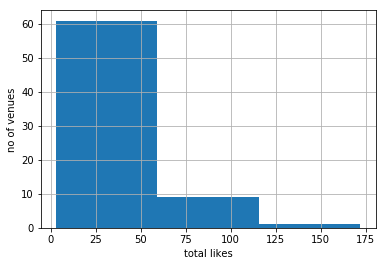

In [15]:
# now let's bin total likes

print(peoria_venues['total likes'].max())
print(peoria_venues['total likes'].min())
print(peoria_venues['total likes'].median())
print(peoria_venues['total likes'].mean())

# let's visualize our total likes based on a histogram

import matplotlib.pyplot as plt
peoria_venues['total likes'].hist(bins=3)
plt.xlabel("total likes")
plt.ylabel("no of venues")
plt.show()

In [16]:
# what are the bins we want to use?

print(np.percentile(peoria_venues['total likes'], 25))
print(np.percentile(peoria_venues['total likes'], 50))
print(np.percentile(peoria_venues['total likes'], 75))

17.0
27.0
41.0


In [17]:
# now we have our bin values so let's set them to the appropriate values
# less than 22, 22-34, >34
# below avg, abv avg, great

below_avg = peoria_venues['total likes']<=22
abv_avg = peoria_venues[(peoria_venues['total likes']>22) & (peoria_venues['total likes']<=34)]
great = peoria_venues['total likes']>34

In [18]:
# let's set up a function that will re-categorize our restaurants based on likes

def categorizeBasedOnLikes(s):
    if s['total likes']<=22:
        return 'below_avg'
    if s['total likes']<=34:
        return 'above avg'
    if s['total likes']>34:
        return 'great'

peoria_venues['total_likes_cat']=peoria_venues.apply(categorizeBasedOnLikes, axis=1)
peoria_venues

,name,id,categories,lat,lng,total likes,location direction,total_likes_cat
1,Thirty-Thirty Coffee Company,4eac9fb4c2ee782cf42582da,Coffee Shop,40.696840,-89.594394,102,North-West,great
3,Sugar,524f526b11d25d7ae15b2ab1,Pizza Place,40.685629,-89.599068,67,South-West,great
5,Jim's Steak House,4c1d4a89b4e62d7f6989dc93,Steakhouse,40.692690,-89.590499,25,South-West,above avg
6,Zion Coffee Bar,5894d99b1470b050ba3a18c5,Coffee Shop,40.686305,-89.598495,16,South-West,below_avg
8,Chili's Grill & Bar,4bb63733ef159c74a29875f7,Tex-Mex Restaurant,40.682540,-89.582335,87,South-East,great
10,Two25,4b7def8ff964a520eada2fe3,American Restaurant,40.693379,-89.587394,33,South-East,above avg
12,One World Eats & Drinks,4b637fe5f964a520ae7e2ae3,Café,40.699866,-89.613044,172,North-West,great
14,Thanh Linh,4b85639af964a520b55a31e3,Vietnamese Restaurant,40.699872,-89.612206,47,North-West,great
15,Rhythm Kitchen,4ba2d01cf964a520441b38e3,American Restaurant,40.688171,-89.590582,33,South-West,above avg
16,Hoops Pub & Pizza,4b89ef1cf964a5202b5732e3,Pizza Place,40.694170,-89.592092,29,North-West,above avg


In [19]:
peoria_venues['total_likes_cat'].value_counts()

below_avg    28
great        25
above avg    18
Name: total_likes_cat, dtype: int64

In [20]:
peoria_venues['categories'].unique()

array(['Coffee Shop', 'Pizza Place', 'Steakhouse', 'Tex-Mex Restaurant',
       'American Restaurant', 'Café', 'Vietnamese Restaurant',
       'Gastropub', 'Bar', 'Karaoke Bar', 'Pub', 'Mexican Restaurant',
       'Wings Joint', 'Lounge', 'Fast Food Restaurant', 'Bakery',
       'Ice Cream Shop', 'Sandwich Place', 'Burger Joint',
       'German Restaurant', 'Breakfast Spot', 'Deli / Bodega',
       'BBQ Joint', 'Seafood Restaurant', 'Beer Bar',
       'Italian Restaurant', 'Smoothie Shop', 'Fried Chicken Joint',
       'Asian Restaurant', 'Hot Dog Joint', 'Restaurant'], dtype=object)

## Group similar categories

In [21]:
# let's create our new categories and create a function to apply those to our existing data


bars = ['Gastropub', 'Bar', 'Karaoke Bar', 'Pub' ,'Lounge', 'Beer Bar' ]
cafe = ['Coffee Shop', 'Café', 'Bakery', 'Ice Cream Shop',
       'Sandwich Place', 'Smoothie Shop']
asian_food =['Vietnamese Restaurant', 'Asian Restaurant']
mexican_food = ['Tex-Mex Restaurant', 'Mexican Restaurant', 'Deli / Bodega']
american_food = ['Pizza Place', 'Steakhouse', 'American Restaurant' , 'Wings Joint' ,'Fast Food Restaurant', 
                 'Burger Joint',  'BBQ Joint', 'Fried Chicken Joint', 'Hot Dog Joint']
european_food = ['German Restaurant','Italian Restaurant']
miscellaneous = ['Breakfast Spot', 'Seafood Restaurant', 'Restaurant']

def groupSimilarCategories(s):
    if s['categories'] in bars:
        return 'bars'
    if s['categories'] in miscellaneous:
        return 'other'
    if s['categories'] in european_food:
        return 'european'
    if s['categories'] in mexican_food:
        return 'south american'
    if s['categories'] in american_food:
        return 'american restaurant'
    if s['categories'] in asian_food:
        return 'asian restaurant'
    if s['categories'] in cafe:
        return 'Cafe or Bakery or Ice cream shops'

peoria_venues['categories_new']=peoria_venues.apply(groupSimilarCategories, axis=1)
print(peoria_venues['categories_new'].unique())

['Cafe or Bakery or Ice cream shops' 'american restaurant'
 'south american' 'asian restaurant' 'bars' 'european' 'other']


In [22]:
# one hot encoding
peoria_venues_onehot = pd.get_dummies(peoria_venues[['categories_new','total_likes_cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
peoria_venues_onehot['name'] = peoria_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [peoria_venues_onehot.columns[-1]] + list(peoria_venues_onehot.columns[:-1])
peoria_venues_onehot = peoria_venues_onehot[fixed_columns]

peoria_venues_onehot.head()

,name,Cafe or Bakery or Ice cream shops,american restaurant,asian restaurant,bars,european,other,south american,above avg,below_avg,great
1,Thirty-Thirty Coffee Company,1,0,0,0,0,0,0,0,0,1
3,Sugar,0,1,0,0,0,0,0,0,0,1
5,Jim's Steak House,0,1,0,0,0,0,0,1,0,0
6,Zion Coffee Bar,1,0,0,0,0,0,0,0,1,0
8,Chili's Grill & Bar,0,0,0,0,0,0,1,0,0,1


### kmeans

In [23]:

cluster_df = peoria_venues_onehot.drop(['name'], axis=1)

k_clusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

peoria_venues.drop(['categories'], axis=1, inplace = True)
peoria_venues['label'] = kmeans.labels_
peoria_venues.head()

,name,id,lat,lng,total likes,location direction,total_likes_cat,categories_new,label
1,Thirty-Thirty Coffee Company,4eac9fb4c2ee782cf42582da,40.696840,-89.594394,102,North-West,great,Cafe or Bakery or Ice cream shops,1
3,Sugar,524f526b11d25d7ae15b2ab1,40.685629,-89.599068,67,South-West,great,american restaurant,1
5,Jim's Steak House,4c1d4a89b4e62d7f6989dc93,40.692690,-89.590499,25,South-West,above avg,american restaurant,2
6,Zion Coffee Bar,5894d99b1470b050ba3a18c5,40.686305,-89.598495,16,South-West,below_avg,Cafe or Bakery or Ice cream shops,0
8,Chili's Grill & Bar,4bb63733ef159c74a29875f7,40.682540,-89.582335,87,South-East,great,south american,1


### visualize clusters

In [24]:

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, rating in zip(peoria_venues['lat'], peoria_venues['lng'], peoria_venues['name'], 
                                  peoria_venues['label'], peoria_venues['total_likes_cat']):
    label = folium.Popup(str(poi) + ' rating ' + str(rating) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7, ).add_to(map_clusters)
       
map_clusters

###  North-East side of the city have mostly below average bars barring couple of great restaurants and cafes

In [25]:
peoria_venues.loc[peoria_venues['location direction']=='North-East'].sort_values(by= 'categories_new').sort_values(by= 'total_likes_cat')

,name,id,lat,lng,total likes,location direction,total_likes_cat,categories_new,label
93,Leaves And Beans Roasting Company (LnB Coffee),44ed6c95f964a520dd371fe3,40.745525,-89.573787,28,North-East,above avg,Cafe or Bakery or Ice cream shops,2
45,Hofbrau,4586ec20f964a520c03f1fe3,40.708671,-89.565249,25,North-East,above avg,european,2
65,Emack & Bolio's,4bccfab268f976b00eb36383,40.743176,-89.573906,22,North-East,below_avg,Cafe or Bakery or Ice cream shops,0
67,Trefzger's Bakery,4bfb437d65fbc9b6f142916c,40.730295,-89.574017,15,North-East,below_avg,Cafe or Bakery or Ice cream shops,0
73,Peoria Pizza Works,4c1c0f8de9c4ef3b38c045aa,40.735102,-89.574847,22,North-East,below_avg,american restaurant,0
47,Oyster Bar,4be607b72468c928a1f20043,40.695547,-89.542842,21,North-East,below_avg,bars,0
49,Schooner's,4c649edadddfa593642792ff,40.731708,-89.582050,16,North-East,below_avg,bars,0
68,Pour Bros Craft Taproom,5759cb87498e6c0278c00823,40.742317,-89.573255,22,North-East,below_avg,bars,0
98,Hearth,528e5ae3498e8e3d97d72ebe,40.743818,-89.573946,10,North-East,below_avg,other,0
88,Starbucks,4b9d3060f964a520ad9736e3,40.732339,-89.573462,41,North-East,great,Cafe or Bakery or Ice cream shops,1


### North west side of the city has the most number of eatiers and bars and it also the best choices from the city

In [26]:
peoria_venues.loc[peoria_venues['location direction']=='North-West'].sort_values(by= 'categories_new').sort_values(by= 'total_likes_cat')

,name,id,lat,lng,total likes,location direction,total_likes_cat,categories_new,label
84,Hokkaido Restaurant,50ef11f8e4b024b741346051,40.727866,-89.613150,29,North-West,above avg,asian restaurant,2
69,Rizzi's On Sheridan,4dfb7b9ad4c01451df58c04e,40.743794,-89.603698,33,North-West,above avg,european,2
89,Jimmy's Bar,4b89f3adf964a5204a5832e3,40.704484,-89.637310,29,North-West,above avg,bars,2
21,Pitch Karaoke Bar,4c4bd99b46240f475e73e7f3,40.699960,-89.603230,33,North-West,above avg,bars,2
16,Hoops Pub & Pizza,4b89ef1cf964a5202b5732e3,40.694170,-89.592092,29,North-West,above avg,american restaurant,2
40,Bellacino's Pizza & Grinders,4bbe413b9474c9b64054d9b6,40.699187,-89.611779,8,North-West,below_avg,american restaurant,0
46,Steak & Fries,4bb1400df964a52006873ce3,40.699073,-89.612956,7,North-West,below_avg,american restaurant,0
80,Country Club BBQ,53f0407d498e99b7eca85267,40.704049,-89.633796,17,North-West,below_avg,bars,0
78,Popeyes Louisiana Kitchen,4c1e4ff4b9f876b011e17e46,40.709992,-89.593555,17,North-West,below_avg,american restaurant,0
82,Connected,4ca7b4af97c8a1cdd44c7da5,40.727075,-89.615787,14,North-West,below_avg,american restaurant,0


### South East side of the city has the most concentration of the american style food restaurants. It also has quite a many great places to pick from

In [27]:
peoria_venues.loc[peoria_venues['location direction']=='South-East'].sort_values(by= 'categories_new').sort_values(by= 'total_likes_cat')

,name,id,lat,lng,total likes,location direction,total_likes_cat,categories_new,label
42,Potbelly Sandwich Shop,520134fb498ea627f7061aa5,40.669769,-89.583669,26,South-East,above avg,Cafe or Bakery or Ice cream shops,2
29,Lorena's Mexican Restaurant,4b632fe9f964a5202e692ae3,40.680418,-89.582356,31,South-East,above avg,south american,2
76,Qdoba Mexican Grill,4b291382f964a5203b9824e3,40.681663,-89.587677,27,South-East,above avg,south american,2
48,Johnny's Italian Steakhouse,522a650511d2c4631176233e,40.672950,-89.587658,24,South-East,above avg,american restaurant,2
39,Firehouse Pizza,4b86dbf8f964a5203ba231e3,40.665764,-89.581667,24,South-East,above avg,american restaurant,2
90,Bob Evans Restaurant,4b55f6c8f964a5203af927e3,40.668640,-89.575673,24,South-East,above avg,american restaurant,2
10,Two25,4b7def8ff964a520eada2fe3,40.693379,-89.587394,33,South-East,above avg,american restaurant,2
33,Chick-fil-A,56aff21f498eb78a5c3040da,40.668832,-89.583129,12,South-East,below_avg,american restaurant,0
41,Emack & Bolio's Riverfront,51d3332a498ee27473baa736,40.689933,-89.586950,8,South-East,below_avg,Cafe or Bakery or Ice cream shops,0
71,Silver Bullet,4c422f94e26920a13db05fe7,40.668346,-89.579538,14,South-East,below_avg,bars,0


### South west has few great bars and couple of above avergae american restaurants

In [28]:
peoria_venues.loc[peoria_venues['location direction']=='South-West'].sort_values(by= 'categories_new').sort_values(by= 'total_likes_cat')

,name,id,lat,lng,total likes,location direction,total_likes_cat,categories_new,label
5,Jim's Steak House,4c1d4a89b4e62d7f6989dc93,40.692690,-89.590499,25,South-West,above avg,american restaurant,2
15,Rhythm Kitchen,4ba2d01cf964a520441b38e3,40.688171,-89.590582,33,South-West,above avg,american restaurant,2
54,Blue Duck Barbeque Tavern,554265fb498e37f6399d69eb,40.688465,-89.589789,34,South-West,above avg,american restaurant,2
19,8 Bit Beercade,55f21680498ea9ed8c657832,40.685416,-89.595020,23,South-West,above avg,bars,2
6,Zion Coffee Bar,5894d99b1470b050ba3a18c5,40.686305,-89.598495,16,South-West,below_avg,Cafe or Bakery or Ice cream shops,0
85,Kuchie's on the Water,50365a0be4b0419538ac9473,40.648287,-89.609813,20,South-West,below_avg,american restaurant,0
24,Kenny's Westside Pub,5813786138faf033ee9cd05c,40.692526,-89.591149,7,South-West,below_avg,bars,0
3,Sugar,524f526b11d25d7ae15b2ab1,40.685629,-89.599068,67,South-West,great,american restaurant,1
18,Thyme Kitchen and Craft Beer,570453b8498eefdff0c18120,40.685632,-89.596370,43,South-West,great,bars,1
32,Martini's On Water Street,4b5b06cdf964a52097df28e3,40.688508,-89.589353,46,South-West,great,bars,1


# THANK YOU